## Global Historical Climatology Network

The [Global Historical Climatology Network (GHCN)](http://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn) provides access to integrated database of quality reviewed climate data. For these notebooks, we use the [GHCN to access historical records](http://www.ncdc.noaa.gov/) for precipitation at International Falls, MN, [Station KINL](http://forecast.weather.gov/MapClick.php?lat=48.58&lon=-93.38#.VHNxbZPF_Xg) in the NOAA network.

## Initialization

### Load Python Modules

In [1]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Module to enhance matplotlib plotting
import seaborn
seaborn.set()

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Styles
from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

## Read Precipitation Data Tables

In [2]:
# Directory where data files are stored
dir = "./data/"

# Read .csv file
KINL = pd.read_csv(dir + '434021.csv',index_col=2,parse_dates=True);

# Drop unneeded columns
KINL.drop('STATION',axis=1,inplace=True)
KINL.drop('STATION_NAME',axis=1,inplace=True)
KINL.ix[KINL['SNWD']==-9999,'SNWD'] = float('nan')
KINL.ix[KINL['SNOW']==-9999,'SNOW'] = float('nan')
KINL.ix[KINL['WESD']==-9999,'WESD'] = float('nan')

display(KINL.head())
display(KINL.tail())

,PRCP,SNWD,SNOW,WESD
DATE,,,,
1970-01-01,3,356,3,605
1970-01-02,0,356,0,607
1970-01-03,10,356,10,617
1970-01-04,3,356,3,620
1970-01-05,0,356,0,620


,PRCP,SNWD,SNOW,WESD
DATE,,,,
2014-11-16,5,50,18,NaN
2014-11-17,3,80,5,NaN
2014-11-18,5,80,18,NaN
2014-11-19,18,100,51,NaN
2014-11-20,0,130,3,NaN


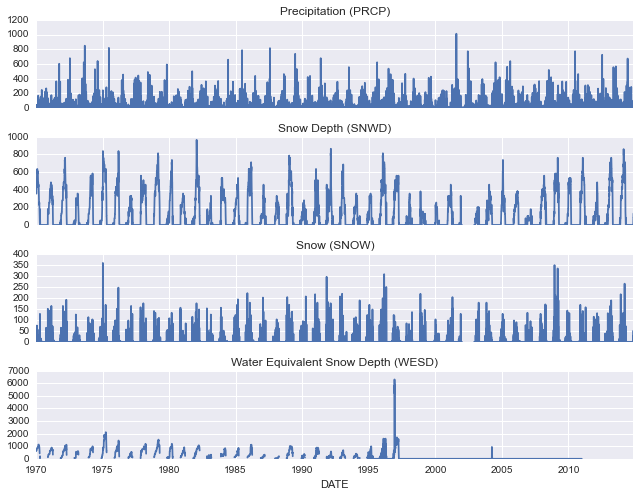

In [3]:
plt.figure(figsize=(9,7))

plt.subplot(4,1,1)
KINL['PRCP'].plot()
plt.title('Precipitation (PRCP)')

plt.subplot(4,1,2)
KINL['SNWD'].plot()
plt.title('Snow Depth (SNWD)')

plt.subplot(4,1,3)
KINL['SNOW'].plot()
plt.title('Snow (SNOW)')

plt.subplot(4,1,4)
KINL['WESD'].plot()
plt.title('Water Equivalent Snow Depth (WESD)')

plt.tight_layout()

## Pickle KINL Precipitation

The data series for water equivalent snow depth appears to be incomplete and not useful the present analysis. The data series for precipitation is converted to a Pandas data series and to standard metric units for precipitation, mm of water. The data series is pickled to a file `PRCP.pkl`.

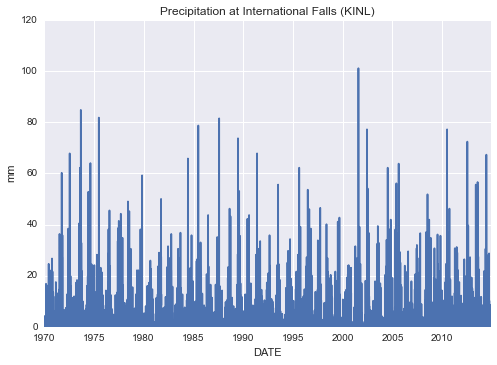

In [4]:
dir = './data/'

KINL = pd.Series(KINL['PRCP'])/10.0
KINL.name = 'Precipitation at International Falls (KINL)'
KINL.to_pickle(dir+'KINL.pkl')

KINL.plot()
plt.title(KINL.name)
plt.ylabel('mm')

## Read Temperature Data Tables

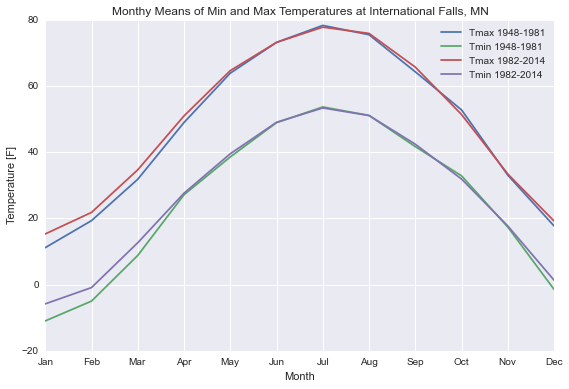

In [154]:
# Directory where data files are stored
dir = "./data/"

# Read .csv file
TEMP = pd.read_csv(dir + '528052.csv',index_col=2,parse_dates=True);

# Drop unneeded columns
TEMP.drop('STATION',axis=1,inplace=True)
TEMP.drop('STATION_NAME',axis=1,inplace=True)
TEMP.drop('TOBS',axis=1,inplace=True)

TEMP.ix[TEMP['TMAX']==-9999,'TMAX'] = float('nan')
TEMP.ix[TEMP['TMIN']==-9999,'TMIN'] = float('nan')

TEMP = 32.0 + (9.0*TEMP/50.0)

Ta = TEMP['1948':'1981']
Ta.columns = ['Tmax 1948-1981', 'Tmin 1948-1981']

Tb = TEMP['1982':'2014']
Tb.columns = ['Tmax 1982-2014', 'Tmin 1982-2014']

df = pd.concat([Ta,Tb], axis=1)
ax = df.groupby(df.index.month).mean().plot()

ax.set_xticks(np.arange(1.0,13.0,1.0))
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));

plt.title('Monthy Means of Min and Max Temperatures at International Falls, MN')
plt.ylabel('Temperature [F]');
plt.xlabel('Month')

plt.tight_layout()
fname = './images/KINL_MonthyMeanTemp.png'
plt.savefig(fname)
!convert $fname -trim $fname

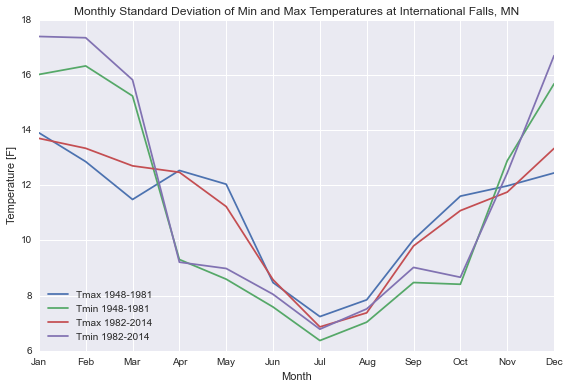

In [155]:
ax = df.groupby(df.index.month).std().plot()

ax.set_xticks(np.arange(1.0,13.0,1.0))
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));

plt.title('Monthly Standard Deviation of Min and Max Temperatures at International Falls, MN')
plt.ylabel('Temperature [F]');
plt.xlabel('Month')

plt.tight_layout()
fname = './images/KINL_MonthyStdTemp.png'
plt.savefig(fname)
!convert $fname -trim $fname